In [0]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("36151-0003-Data.tsv", sep='\t', engine='python')

# Replace the empty values by NaN value
df = df.replace(r'^\s*$', np.nan, regex=True)

# Find the number of valid values for each column
counts = df.count().to_frame('count')
print("NUmber of columns in the given data = ", counts.shape[0])

# Select the columns that have 3/4 th values as valid
filter_columns_df = counts.loc[counts['count']>=int(df.shape[0]*0.75)]
filter_columns_list = filter_columns_df.index.tolist()
print("Number of columns chosen for analysis = ", filter_columns_df.shape[0])

# Drop the remaining columns from data frame
df = df[filter_columns_list]
df.shape

NUmber of columns in the given data =  580
Number of columns chosen for analysis =  343


(39523, 343)

In [3]:
df.head()

,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,IDHH,IDPERSON,GE10A,GE10B,GE11,GE12,GE13,CD3D,CD3M,CD3Y,CD3DATE,CD4A,CD4B,CD4C,EW5,EW6,EW8,EW9,EW10,EW11,EW12A,EW12B,EW12C,EW12D,EW14A,EW14B,EW14C,EW14D,EW15A,EW15B,EW15C,EW15D,...,AP9,EWELIGIBLE,WKANY5,WKANIMAL,WKBUSINESS,WKAGLAB,WKFARM,WKNONAG,WKSALARY,WKNREGA,WKHOURS,NFHOURS,WKDAYS,NFDAYS,RSUNEARN,SPRO10,SPRO3,SPRO4,SPRO5,SPRO6,SPRO8,SPED2,SPED3,SPED4,SPED6,SPWKANY5,SPWKANIMAL,SPWKBUSINESS,SPWKAGLAB,SPWKFARM,SPWKNONAG,SPWKHOURS,SPWKDAYS,EWQELIGIBLE,AGERANK,NEVMFEM,EWPOSITION,NEWQELIGIBLE,WTEW,FWTEW
0,2,1,2,1,10,1,2,10201,102010101,10201010102,1,1,2,2,9,3,7,2012,19177,10,50,1,2,49,0,4,5,2,1,0,1,1,0,0,0,0,0,0,0,0,...,65.69999694825,1,2,3,0,0,2,0,0,0,24,0,6,0,175804.109375,69,1,1,57,1,2,0,0,0,0,4,0,0,0,0,3,4000,365,1,1,2,2,2,3687.926270,3688
1,2,1,2,1,10,1,6,10201,102010101,10201010106,NaN,NaN,NaN,NaN,NaN,3,7,2012,19177,10,15,1,4,26,8,3,5,2,1,1,1,1,0,1,0,0,0,6,0,0,...,60,1,0,0,0,0,0,0,0,0,0,0,0,0,176100.000000,2,1,3,29,1,6,1,1,1,9,4,0,0,0,0,3,3300,275,1,2,2,3,2,3687.926270,3688
2,2,1,2,1,20,1,8,10201,102010201,10201020108,1,1,1,3,3,3,7,2012,19177,10,0,1,4,33,12,3,3,3,1,1,0,1,0,0,0,1,0,0,0,12,...,60.29999923707,1,4,0,0,0,0,0,4,0,2555,0,365,0,999500.000000,75,1,3,37,1,8,1,2,1,16,4,0,0,0,0,0,2555,365,1,2,3,3,1,11063.779297,11064
3,2,1,2,1,30,1,2,10201,102010301,10201030102,1,1,1,2,9,3,7,2012,19177,12,25,2,2,43,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,...,79.09999847413,1,3,3,0,0,3,0,0,0,240,0,60,0,178200.000000,75,1,1,45,1,2,1,2,1,10,4,0,0,0,0,0,2555,365,1,1,1,1,1,3687.926270,3688
4,2,1,2,1,40,1,2,10201,102010401,10201040102,1,1,1,3,9,3,7,2012,19177,1,20,2,2,47,0,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,...,56.40000152588,1,3,3,0,0,3,0,0,0,450,0,90,0,89568.335938,69,1,1,57,1,2,0,0,0,0,4,0,0,0,3,4,2710,350,1,1,1,1,1,3687.926270,3688


In [4]:
df = df[
['EW5'
,'EW6'
,'EW8'
,'EW9'
,'EW10'
,'EW16A'
,'EW16B'
,'HB1'
,'HB2'
,'HB3'
,'HB4'
,'HB5'
,'HB6'
,'HB7'
,'HB8'
,'AI1'
,'GR9F'
,'GR18A'
,'GR18B'
,'GR22'
,'GR27A'
,'MH1A'
,'MH2'
,'FP2A'
,'URBAN2011'
,'METRO'
,'COPC'
,'INCOMEPC'
,'NPERSONS'
]]

df.head()

,EW5,EW6,EW8,EW9,EW10,EW16A,EW16B,HB1,HB2,HB3,HB4,HB5,HB6,HB7,HB8,AI1,GR9F,GR18A,GR18B,GR22,GR27A,MH1A,MH2,FP2A,URBAN2011,METRO,COPC,INCOMEPC,NPERSONS
0,2,49,0,4,5,0,0,0,1,1,3,2,4,4,2,1,1,0,0,0,1,10,1,1,0,0,28476.4453125,19566.666016,9
1,4,26,8,3,5,0,1,1,0,1,3,2,4,3,2,1,1,0,0,1,1,18,1,1,0,0,28476.4453125,19566.666016,9
2,4,33,12,3,3,0,0,0,NaN,1,2,2,4,3,3,1,1,0,0,1,1,20,1,1,0,0,40031.25,64946.875000,16
3,2,43,0,5,3,0,0,0,NaN,1,2,2,4,4,5,0,1,0,0,0,1,20,1,1,0,0,15603.428711,26048.572266,7
4,2,47,0,3,3,0,0,0,NaN,1,2,3,4,4,5,0,1,0,0,0,0,22,1,1,0,0,20193.1992188,18152.000000,5


In [5]:
df.shape

(39523, 29)

In [6]:
# Age groups 
# 00 - 18
# 18 - 20
# 20 - 30
# 30 - 40
# 40 - 50
# 50 - 60
# 60 or greater

bins= [0, 18, 20, 30, 40, 50, 60, 150]
labels = [0, 1, 2, 3, 4, 5, 6]
df['EW6'] = pd.cut(df['EW6'], bins=bins, labels=labels, right=False)
df.head()

,EW5,EW6,EW8,EW9,EW10,EW16A,EW16B,HB1,HB2,HB3,HB4,HB5,HB6,HB7,HB8,AI1,GR9F,GR18A,GR18B,GR22,GR27A,MH1A,MH2,FP2A,URBAN2011,METRO,COPC,INCOMEPC,NPERSONS
0,2,4,0,4,5,0,0,0,1,1,3,2,4,4,2,1,1,0,0,0,1,10,1,1,0,0,28476.4453125,19566.666016,9
1,4,2,8,3,5,0,1,1,0,1,3,2,4,3,2,1,1,0,0,1,1,18,1,1,0,0,28476.4453125,19566.666016,9
2,4,3,12,3,3,0,0,0,NaN,1,2,2,4,3,3,1,1,0,0,1,1,20,1,1,0,0,40031.25,64946.875000,16
3,2,4,0,5,3,0,0,0,NaN,1,2,2,4,4,5,0,1,0,0,0,1,20,1,1,0,0,15603.428711,26048.572266,7
4,2,4,0,3,3,0,0,0,NaN,1,2,3,4,4,5,0,1,0,0,0,0,22,1,1,0,0,20193.1992188,18152.000000,5


In [7]:
#Years of education split into Primary, Secondary, Higher Secondary,Post Secondary, Bachelor's Above Bachelor's
df['EW8'].fillna(0, inplace=True)
df['EW8'] = df['EW8'].astype(int)
df.loc[df['EW8'].between(0,11), 'EW8'] = 1
df.loc[df['EW8'].between(10,13), 'EW8'] = 2
df.loc[df['EW8'].between(12,15), 'EW8'] = 3
df['EW8'].unique()

array([ 1,  2,  3, 16])

In [0]:
#Years of mother's education split into Primary, Secondary, Higher Secondary,Post Secondary, Bachelor's Above Bachelor's
df['EW15A'].fillna(0, inplace=True)
df['EW15A'] = df['EW15A'].astype(int)
df.loc[df['EW15A'].between(0,11), 'EW15A'] = 1
df.loc[df['EW15A'].between(10,13), 'EW15A'] = 2
df.loc[df['EW15A'].between(12,15), 'EW15A'] = 3
df['EW15A'].unique()

In [0]:
#Years of father's education split into Primary, Secondary, Higher Secondary,Post Secondary, Bachelor's Above Bachelor's
df['EW15B'].fillna(0, inplace=True)
df['EW15B'] = df['EW15B'].astype(int)
df.loc[df['EW15B'].between(0,11), 'EW15B'] = 1
df.loc[df['EW15B'].between(10,13), 'EW15B'] = 2
df.loc[df['EW15B'].between(12,15), 'EW15B'] = 3
df['EW15B'].unique()

In [0]:
#Years of brother's education split into Primary, Secondary, Higher Secondary,Post Secondary, Bachelor's Above Bachelor's
df['EW18A'].fillna(0, inplace=True)
df['EW18A'] = df['EW18A'].astype(int)
df.loc[df['EW18A'].between(0,11), 'EW18A'] = 1
df.loc[df['EW18A'].between(10,13), 'EW18A'] = 2
df.loc[df['EW18A'].between(12,15), 'EW18A'] = 3
df['EW18A'].unique()

In [0]:
#Years of sister's education split into Primary, Secondary, Higher Secondary,Post Secondary, Bachelor's Above Bachelor's
df['EW18B'].fillna(0, inplace=True)
df['EW18B'] = df['EW18B'].astype(int)
df.loc[df['EW18B'].between(0,11), 'EW18B'] = 1
df.loc[df['EW18B'].between(10,13), 'EW18B'] = 2
df.loc[df['EW18B'].between(12,15), 'EW18B'] = 3
df['EW18B'].unique()

In [8]:
# Age groups 
# 00 - 18
# 18 - 20
# 20 - 30
# 30 - 40
# 40 - 50
# 50 - 60

bins= [0, 18, 20, 30, 40, 50, 60]
labels = [0, 1, 2, 3, 4, 5]     
  
df['MH1A'].fillna(0, inplace=True)
df['MH1A'] = df['MH1A'].astype(int)
df['MH1A'] = pd.cut(df['MH1A'], bins=bins, labels=labels, right=False)
df.head()

,EW5,EW6,EW8,EW9,EW10,EW16A,EW16B,HB1,HB2,HB3,HB4,HB5,HB6,HB7,HB8,AI1,GR9F,GR18A,GR18B,GR22,GR27A,MH1A,MH2,FP2A,URBAN2011,METRO,COPC,INCOMEPC,NPERSONS
0,2,4,1,4,5,0,0,0,1,1,3,2,4,4,2,1,1,0,0,0,1,0,1,1,0,0,28476.4453125,19566.666016,9
1,4,2,1,3,5,0,1,1,0,1,3,2,4,3,2,1,1,0,0,1,1,1,1,1,0,0,28476.4453125,19566.666016,9
2,4,3,2,3,3,0,0,0,NaN,1,2,2,4,3,3,1,1,0,0,1,1,2,1,1,0,0,40031.25,64946.875000,16
3,2,4,1,5,3,0,0,0,NaN,1,2,2,4,4,5,0,1,0,0,0,1,2,1,1,0,0,15603.428711,26048.572266,7
4,2,4,1,3,3,0,0,0,NaN,1,2,3,4,4,5,0,1,0,0,0,0,2,1,1,0,0,20193.1992188,18152.000000,5


In [0]:
# Age groups 
# 00 - 10
# 10 - 18
# 18 - 30

bins= [0, 10, 18, 30]
labels = [0, 1, 2]

df['MH1E'].fillna(0, inplace=True)
df['MH1E'] = df['MH1E'].astype(int)
df['MH1E'] = pd.cut(df['MH1E'], bins=bins, labels=labels, right=False)
df.head()

In [10]:
# split HH expenditure to low, medium, high

df['COPC'] = df['COPC'].astype(float)
print(df['COPC'].quantile([0.25,0.5,0.75]))
df.loc[df['COPC'] < 12924.000000, 'COPC'] = 1
df.loc[df['COPC'].between(12924.000000,30920.000000), 'COPC'] = 2
df.loc[df['COPC'] >  30920.000000, 'COPC'] = 3
df['COPC'].unique()

0.25    12542.000000
0.50    18827.867188
0.75    29720.000000
Name: COPC, dtype: float64


array([ 2.,  3.,  1., nan])

In [11]:
# split income to low, medium, high

print(df['INCOMEPC'].quantile([0.25,0.5,0.75]))
df.loc[df['INCOMEPC'] < 9214.545898, 'INCOMEPC'] = 1
df.loc[df['INCOMEPC'].between(9214.545898,32359.375000), 'INCOMEPC'] = 2
df.loc[df['INCOMEPC'] >  32359.375000, 'INCOMEPC'] = 3
df['INCOMEPC'].unique()

0.25     9000.000000
0.50    16333.333008
0.75    31166.666016
Name: INCOMEPC, dtype: float64


array([2., 3., 1.])

In [0]:
df.to_csv("cleaned_data.csv")

In [12]:
import numpy as np

def is_nan(x):
    return (x is np.nan or x != x)

transactions = []

for index, row in df.iterrows():
  tran = []
  for col in df.columns:
    if not is_nan(row[col]):
      tran.append(col + "_" + str(row[col]))
  transactions.append(tran)
      
print("Shape of df : ", df.shape)
print("Num of Transactions : ", len(transactions))
print(transactions[:2])

Shape of df :  (39523, 29)
Num of Transactions :  39523
[['EW5_2', 'EW6_4', 'EW8_1', 'EW9_4', 'EW10_5', 'EW16A_0', 'EW16B_0', 'HB1_0', 'HB2_1', 'HB3_1', 'HB4_3', 'HB5_2', 'HB6_4', 'HB7_4', 'HB8_2', 'AI1_1', 'GR9F_1', 'GR18A_0', 'GR18B_0', 'GR22_0', 'GR27A_1', 'MH1A_0', 'MH2_1', 'FP2A_1', 'URBAN2011_0', 'METRO_0', 'COPC_2.0', 'INCOMEPC_2.0', 'NPERSONS_9'], ['EW5_4', 'EW6_2', 'EW8_1', 'EW9_3', 'EW10_5', 'EW16A_0', 'EW16B_1', 'HB1_1', 'HB2_0', 'HB3_1', 'HB4_3', 'HB5_2', 'HB6_4', 'HB7_3', 'HB8_2', 'AI1_1', 'GR9F_1', 'GR18A_0', 'GR18B_0', 'GR22_1', 'GR27A_1', 'MH1A_1', 'MH2_1', 'FP2A_1', 'URBAN2011_0', 'METRO_0', 'COPC_2.0', 'INCOMEPC_2.0', 'NPERSONS_9']]


In [0]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df
df.to_csv("df_data")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori
# from apyori import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
# association_rules = apriori(transactions, min_support=0.3, min_confidence=0.5)
# association_results = list(association_rules)

,support,itemsets,length
0,0.636414,(AI1_1),1
1,0.524631,(EW10_2),1
2,0.758596,(EW16A_0),1
3,0.558358,(EW16B_0),1
4,0.649748,(EW5_2),1
...,...,...,...
688,0.514764,"(METRO_0, GR18B_0, EW8_1, HB7_3, GR18A_0, MH2_1)",6
689,0.503580,"(HB4_2, METRO_0, EW8_1, HB7_3, GR18A_0, MH2_1)",6
690,0.507198,"(HB4_2, METRO_0, HB3_1, GR18B_0, GR18A_0, MH2_1)",6
691,0.506414,"(METRO_0, HB3_1, GR18B_0, HB7_3, GR18A_0, MH2_1)",6


In [0]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

In [16]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(AI1_1),(GR18A_0),0.636414,0.943628,0.590719,0.928199,0.983650,-0.009819,0.785122,1
1,(AI1_1),(MH2_1),0.636414,0.934114,0.598892,0.941041,1.007415,0.004408,1.117480,1
2,(EW16B_0),(EW16A_0),0.558358,0.758596,0.538168,0.963839,1.270556,0.114599,6.675812,1
3,(EW16A_0),(EW8_1),0.758596,0.876781,0.719758,0.948803,1.082144,0.054636,2.406752,1
4,(EW16A_0),(GR18A_0),0.758596,0.943628,0.720467,0.949737,1.006474,0.004634,1.121534,1
...,...,...,...,...,...,...,...,...,...,...
934,"(METRO_0, HB3_1, GR18B_0, HB7_3, MH2_1)",(GR18A_0),0.527237,0.943628,0.506414,0.960505,1.017885,0.008898,1.427320,5
935,"(HB3_1, GR18B_0, HB7_3, METRO_0)","(MH2_1, GR18A_0)",0.560357,0.882549,0.506414,0.903734,1.024004,0.011871,1.220065,4
936,"(HB4_2, METRO_0, GR18B_0, GR18A_0, HB7_3)",(MH2_1),0.546922,0.934114,0.514586,0.940877,1.007240,0.003699,1.114386,5
937,"(HB4_2, METRO_0, GR18B_0, HB7_3, MH2_1)",(GR18A_0),0.534474,0.943628,0.514586,0.962791,1.020308,0.010242,1.515022,5


In [0]:
rules_filtered = rules[ (rules['antecedent_len'] >= 2) &
       (rules['lift'] > 0.8) ]

In [0]:
lookup = dict()
lookup['EW5'] = "Relationship to Household head"
lookup['EW6'] = "Age (in years)"
# lookup['EW7Y'] = "Year of birth"
lookup['EW8'] = "Years of education completed"
lookup['EW9'] = "N children alive"
lookup['EW10'] = "Your general health"
lookup['EW13A'] = "Mother lives in household"
lookup['EW13B'] = "Father lives in household"
# lookup['EW14A'] = "Mother attended school"
# lookup['EW15A'] = "Mother education"
# lookup['EW15B'] = "Father education"
lookup['EW16A'] = "Mother literate"
lookup['EW16B'] = "Father literate"
# lookup['EW16C'] = "Mother-in-law literate"
# lookup['EW18A'] = "Brother highest education"
# lookup['EW18B'] = "Sister highest education"
lookup['HB1'] = "glasses of milk daily harmful during pregnancy"
lookup['HB2'] = "Belief: Men physically weak months after sterilization"
lookup['HB3'] = "Belief: 1st milk after birth good for baby"
lookup['HB4'] = "Belief: Chulha smoke good for health"
lookup['HB5'] = "Belief: Child diarrhea more to drink"
lookup['HB6'] = "Belief: Illness spread through impure water"
lookup['HB7'] = "Belief: How Malaria spreads"
lookup['HB8'] = "Belief: Pregnancy most likely during menstrual cycle"
lookup['AI1'] = "HIV/AIDS Awareness"
lookup['GR9F'] = "Can visit health centre alone (permission needed or not)"
# lookup['GR13A'] = "Past 5 years: Been to metro city (beside current residence)"
# lookup['GR16A'] = "Past 5 years: Been to another state"
# lookup['GR17A'] = "Past 5 years: Been abroad"
lookup['GR18A'] = "Are you a member of a: Mahila Mandal"
lookup['GR18B'] = "Are you a member of a: Self-help group"
lookup['GR22'] = "Family outings to cinema, mela, or restaurant"
lookup['GR27A'] = "Family member has bank account"
lookup['MH1A'] = "Age at marriage (in years)"
# lookup['MH1E'] = "Age first started menarche (in years)"
lookup['MH2'] = "Marriage status"
# lookup['MH4A'] = "Who chose your husband"
lookup['MH4B'] = "Did you have any say in choosing your husband"
lookup['FP2A'] = "Currently use contraceptives"
lookup['URBAN2011'] = "Urban residence from census 2011"
lookup['METRO'] = "Largest 6 metro areas 0/1"
# lookup['ID11'] = "Religion"
# lookup['ID13'] = "Caste category"
lookup['COPC'] = "Household expenditure /capita"
lookup['INCOMEPC'] = "per capita income"
lookup['NPERSONS'] = "N in household"
# lookup['ED2'] = "Education: Literacy"
# lookup['ED4'] = "Education: Attended school"

In [20]:
def format_item(item):
  return item.split("_")

for index, row in rules_filtered.iterrows():
  ant = row['antecedents']
  con = row['consequents']
  for a in ant:
    item = format_item(a)
    print(lookup[item[0]]," \"", item[1], "\", ", end =" ") 
  print(" =====> ", end =" ") 
  for c in con:
    item = format_item(c)
    print(lookup[item[0]]," \"", item[1], "\", ", end =" ") 
  print()

  # Largest 6 metro areas 0/1  " 0 ",  Mother literate  " 0 ",   =====>  Years of education completed  " 1 ",
  

Are you a member of a: Self-help group  " 0 ",  HIV/AIDS Awareness  " 1 ",   =====>  Are you a member of a: Mahila Mandal  " 0 ",  
Belief: 1st milk after birth good for baby  " 1 ",  HIV/AIDS Awareness  " 1 ",   =====>  Are you a member of a: Mahila Mandal  " 0 ",  
Belief: How Malaria spreads  " 3 ",  HIV/AIDS Awareness  " 1 ",   =====>  Are you a member of a: Mahila Mandal  " 0 ",  
Largest 6 metro areas 0/1  " 0 ",  HIV/AIDS Awareness  " 1 ",   =====>  Are you a member of a: Mahila Mandal  " 0 ",  
Marriage status  " 1 ",  HIV/AIDS Awareness  " 1 ",   =====>  Are you a member of a: Mahila Mandal  " 0 ",  
HIV/AIDS Awareness  " 1 ",  Are you a member of a: Mahila Mandal  " 0 ",   =====>  Marriage status  " 1 ",  
Are you a member of a: Self-help group  " 0 ",  HIV/AIDS Awareness  " 1 ",   =====>  Marriage status  " 1 ",  
Belief: 1st milk after birth good for baby  " 1 ",  HIV/AIDS Awareness  " 1 ",   =====>  Belief: How Malaria spreads  " 3 ",  
Belief: How Malaria spreads  " 3 ", 

In [0]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    return x

In [45]:
train = corr_df(df, 0.6)
train

,EW5,EW6,EW8,EW9,EW10,EW14A,EW15A,EW15B,EW16A,EW16B,EW16C,EW18A,EW18B,HB1,HB2,HB3,HB4,HB5,HB6,HB7,HB8,AI1,GR9F,GR13A,GR16A,GR17A,GR18A,GR18B,GR22,GR27A,MH1A,MH1E,MH2,MH4A,FP2A,URBAN2011,METRO,ID11,ID13,COPC,INCOMEPC,NPERSONS,ED2,ED4
0,2,4,1,4,5,0,1,1,0,0,0,16,3,0,1,1,3,2,4,4,2,1,1,0,0,0,0,0,0,1,0,2,1,3,1,0,0,2,3,2.0,2.0,9,0,0
1,4,2,1,3,5,0,1,1,0,1,0,1,1,1,0,1,3,2,4,3,2,1,1,0,0,0,0,0,1,1,1,1,1,3,1,0,0,2,3,2.0,2.0,9,1,1
2,4,3,2,3,3,0,1,1,0,0,0,2,1,0,NaN,1,2,2,4,3,3,1,1,0,0,0,0,0,1,1,2,1,1,2,1,0,0,2,NaN,3.0,3.0,16,1,1
3,2,4,1,5,3,0,1,1,0,0,0,1,1,0,NaN,1,2,2,4,4,5,0,1,0,0,0,0,0,0,1,2,1,1,2,1,0,0,2,3,2.0,2.0,7,0,0
4,2,4,1,3,3,0,1,1,0,0,0,1,1,0,NaN,1,2,3,4,4,5,0,1,0,0,0,0,0,0,0,2,1,1,3,1,0,0,2,2,2.0,2.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39518,2,3,1,2,1,0,1,1,0,0,0,1,1,0,0,1,2,2,2,3,4,1,1,1,1,0,0,0,1,1,1,1,1,2,1,1,0,1,3,2.0,2.0,4,1,1
39519,1,3,1,2,1,0,1,1,0,1,0,1,1,0,NaN,1,2,2,2,3,4,1,1,0,1,0,0,0,1,1,0,1,3,2,1,1,0,1,3,3.0,2.0,3,1,1
39520,3,3,1,2,1,0,1,1,0,1,0,1,1,0,NaN,1,2,2,2,3,4,1,1,1,1,0,0,0,1,1,1,1,3,2,1,1,0,1,3,2.0,1.0,4,1,1
39521,2,5,1,3,1,0,1,1,0,0,0,16,2,0,0,1,2,2,2,3,4,1,1,1,1,0,0,1,1,1,0,1,1,2,1,1,0,1,3,2.0,2.0,4,1,1


In [46]:
train.fillna(train.mean(), inplace=True)

ValueError: ignored

In [47]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,20.27)})
sns.set(style="whitegrid")
ax = sns.countplot(y="STATEID", hue="ED2", data=train)
ax.plot()

ValueError: ignored

[]

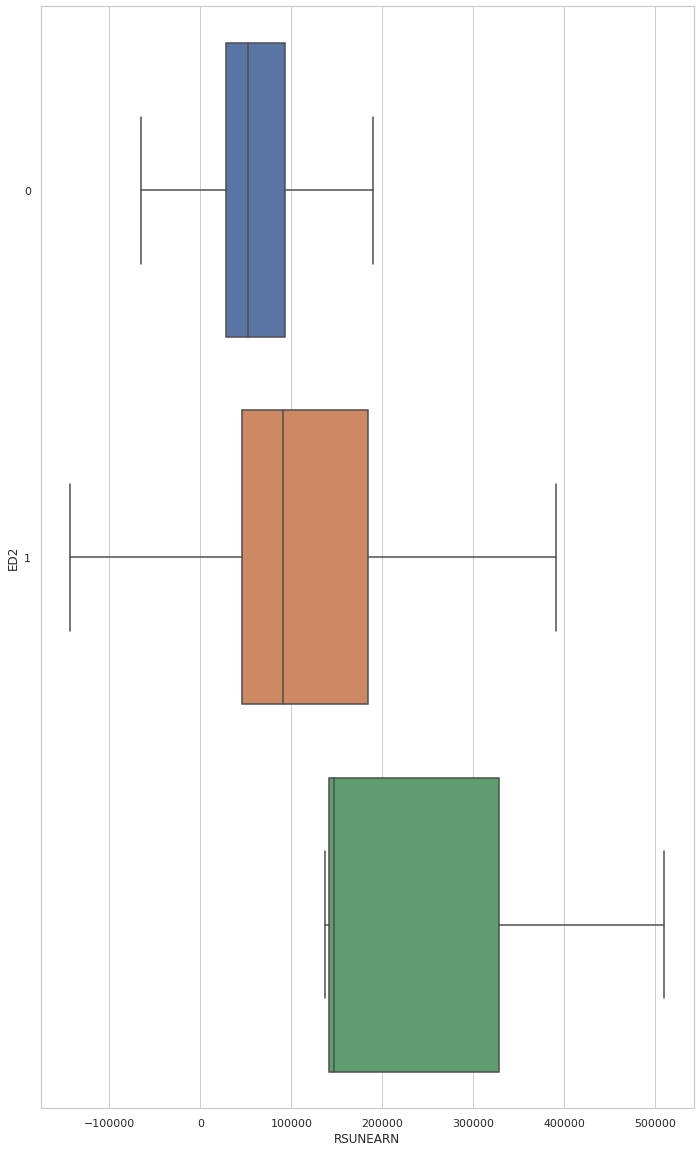

In [0]:
ax = sns.boxplot(x=train.RSUNEARN, y=train.ED2, showfliers=False)
ax.plot()

In [0]:
train.ED2.unique()

array(['0', '1', ' '], dtype=object)

In [0]:
train.WKANY5.unique()

array([2, 0, 4, 3, 1])

In [0]:
train.groupby("WKANY5")['RSUNEARN'].mean()

WKANY5
0    158506.019072
1    150187.685872
2    103126.154411
3     83028.275782
4    117721.837794
Name: RSUNEARN, dtype: float64

In [0]:
train.groupby("ED2")['RSUNEARN'].mean()

ED2
     264346.666667
0     79747.408307
1    154277.323893
Name: RSUNEARN, dtype: float64

[]

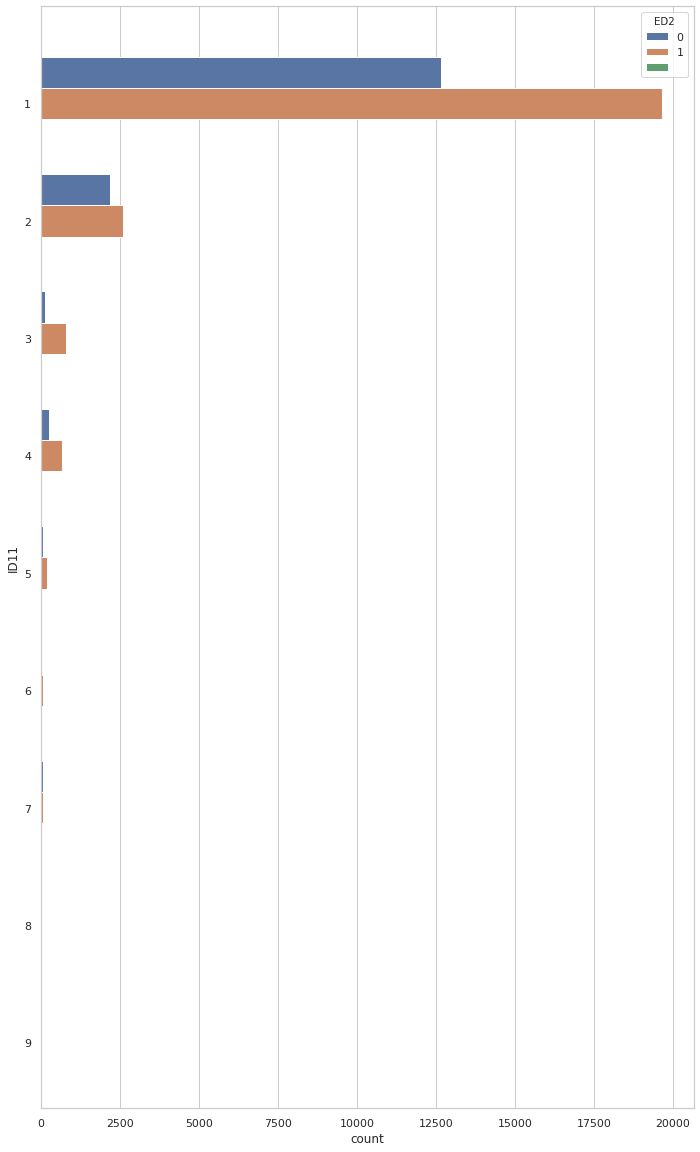

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,20.27)})
sns.set(style="whitegrid")
ax = sns.countplot(y="ID11", hue="ED2", data=train)
ax.plot()